In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [2]:
# MAIN_GOAL: grouping buildings to possible see some unseen information about the data - WITH LESS FEATURES

In [3]:
df = pd.read_csv('../Data/cleaned_data/green_roofs2.csv')

df

,green_roof_area,building_area,ratio_green_area,construction_year,roof_height,ground_elev,digitized,borough,xcoord,ycoord,area_type
0,971,14057,0.07,1900,59,90,1,BK,-73.93491,40.67389,public
1,696,4463,0.16,1900,13,21,0,MN,-73.99982,40.73481,commercial
2,293,13217,0.02,1900,93,7,0,MN,-74.00906,40.72480,commercial
3,759,4311,0.18,1900,99,21,0,MN,-74.00836,40.71595,commercial
4,7204,35891,0.20,1990,206,10,1,BX,-73.91227,40.81906,commercial
...,...,...,...,...,...,...,...,...,...,...,...
725,1525,6414,0.24,1800,104,6,0,MN,-74.00968,40.72554,residential
726,343,2941,0.12,1990,118,42,1,MN,-73.99311,40.72600,public
727,309,4350,0.07,1990,175,18,1,MN,-74.01044,40.71474,industrial
728,8139,20051,0.41,1960,23,12,0,MN,-73.93708,40.79703,commercial


In [4]:
df.describe()

,green_roof_area,building_area,ratio_green_area,construction_year,roof_height,ground_elev,digitized,xcoord,ycoord
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,3060.008219,22724.094521,0.178466,1943.232877,142.563014,41.479452,0.212329,-73.966182,40.745905
std,6059.135823,31208.241425,0.171618,42.802549,148.077963,33.204033,0.409237,0.045822,0.053641
min,10.000000,522.000000,0.000000,1800.000000,8.000000,-4.000000,0.000000,-74.077320,40.572220
25%,438.750000,4319.000000,0.060000,1900.000000,51.000000,15.000000,0.000000,-73.996075,40.717370
50%,1171.500000,12143.000000,0.120000,1930.000000,85.500000,32.000000,0.000000,-73.978630,40.741695
75%,3121.750000,27632.000000,0.230000,1990.000000,184.000000,61.000000,0.000000,-73.950568,40.773907
max,66025.000000,280739.000000,0.980000,1990.000000,1408.000000,168.000000,1.000000,-73.751320,40.896350


In [5]:
df.columns

Index(['green_roof_area', 'building_area', 'ratio_green_area',
       'construction_year', 'roof_height', 'ground_elev', 'digitized',
       'borough', 'xcoord', 'ycoord', 'area_type'],
      dtype='object')

In [6]:
# to have the same display like in the last models
#this time we will encode the categoricals with one hot encoder
#this time we will reduce the features

df = df[['building_area', 'roof_height','borough','construction_year','area_type', 'green_roof_area' ]]

df

,building_area,roof_height,borough,construction_year,area_type,green_roof_area
0,14057,59,BK,1900,public,971
1,4463,13,MN,1900,commercial,696
2,13217,93,MN,1900,commercial,293
3,4311,99,MN,1900,commercial,759
4,35891,206,BX,1990,commercial,7204
...,...,...,...,...,...,...
725,6414,104,MN,1800,residential,1525
726,2941,118,MN,1990,public,343
727,4350,175,MN,1990,industrial,309
728,20051,23,MN,1960,commercial,8139


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   building_area      730 non-null    int64 
 1   roof_height        730 non-null    int64 
 2   borough            730 non-null    object
 3   construction_year  730 non-null    int64 
 4   area_type          730 non-null    object
 5   green_roof_area    730 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 34.3+ KB


In [8]:
# we want that the construction_year be categorical

df['construction_year'] = df['construction_year'].apply(str)


C:\Users\Admin\AppData\Local\Temp\ipykernel_14384\3121351444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['construction_year'] = df['construction_year'].apply(str)


In [9]:
#TRANSFORMING NUMERICALS

num = df.select_dtypes([np.number])
num

transformer = StandardScaler()
transformer.fit(num)
num_scaled_1 = transformer.transform(num)
num_scaled = pd.DataFrame(num_scaled_1, columns = num.columns)
num_scaled


,building_area,roof_height,green_roof_area
0,-0.277909,-0.564705,-0.345006
1,-0.585538,-0.875565,-0.390424
2,-0.304843,-0.334938,-0.456980
3,-0.590412,-0.294391,-0.380019
4,0.422194,0.428696,0.684393
...,...,...,...
725,-0.522980,-0.260602,-0.253512
726,-0.634341,-0.165993,-0.448723
727,-0.589161,0.219204,-0.454338
728,-0.085712,-0.807986,0.838812


In [10]:
#TRANSFORMING CATEGORICALS

cat = df.select_dtypes(['object'])
cat

encoder = OneHotEncoder()
cat_enc_1 = encoder.fit_transform(cat).toarray()
cat_enc = pd.DataFrame(cat_enc_1, columns = encoder.get_feature_names_out())
cat_enc


,borough_BK,borough_BX,borough_MN,borough_QN,borough_SI,construction_year_1800,construction_year_1850,construction_year_1900,construction_year_1930,construction_year_1960,construction_year_1990,area_type_commercial,area_type_industrial,area_type_public,area_type_residential
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
726,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
728,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [11]:
df_treated = pd.concat([num_scaled, cat_enc], axis = 1)
df_treated

,building_area,roof_height,green_roof_area,borough_BK,borough_BX,borough_MN,borough_QN,borough_SI,construction_year_1800,construction_year_1850,construction_year_1900,construction_year_1930,construction_year_1960,construction_year_1990,area_type_commercial,area_type_industrial,area_type_public,area_type_residential
0,-0.277909,-0.564705,-0.345006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.585538,-0.875565,-0.390424,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.304843,-0.334938,-0.456980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.590412,-0.294391,-0.380019,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.422194,0.428696,0.684393,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,-0.522980,-0.260602,-0.253512,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
726,-0.634341,-0.165993,-0.448723,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
727,-0.589161,0.219204,-0.454338,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
728,-0.085712,-0.807986,0.838812,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [12]:
df_treated.isna().sum() # concat went well

building_area             0
roof_height               0
green_roof_area           0
borough_BK                0
borough_BX                0
borough_MN                0
borough_QN                0
borough_SI                0
construction_year_1800    0
construction_year_1850    0
construction_year_1900    0
construction_year_1930    0
construction_year_1960    0
construction_year_1990    0
area_type_commercial      0
area_type_industrial      0
area_type_public          0
area_type_residential     0
dtype: int64

In [13]:
# checking the best  k

K = range(2,12)

inertia = []
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state = 19, verbose = 1)
    kmeans.fit(df_treated)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_treated, kmeans.predict(df_treated)))



C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 4366.263352919916.
Iteration 1, inertia 2852.032279716297.
Iteration 2, inertia 2826.4334960941865.
Iteration 3, inertia 2822.5571994598454.
Iteration 4, inertia 2819.7135222675215.
Iteration 5, inertia 2819.2153988300774.
Iteration 6, inertia 2819.0697963842263.
Iteration 7, inertia 2818.7553043081393.
Iteration 8, inertia 2818.3782658734867.
Iteration 9, inertia 2818.331475449112.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 4568.415852257863.
Iteration 1, inertia 2844.989633059306.
Iteration 2, inertia 2819.4085575280983.
Iteration 3, inertia 2818.2491791490656.
Iteration 4, inertia 2817.8593497195448.
Iteration 5, inertia 2817.7755792662742.
Iteration 6, inertia 2817.664452321438.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 4448.740365157068.
Iteration 1, inertia 2845.2834103539294.
Iteration 2, inertia 2819.736305627899.
Iteration 3, inertia 281

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 5, inertia 2583.1497750178096.
Iteration 6, inertia 2577.184475460636.
Iteration 7, inertia 2571.464059302557.
Iteration 8, inertia 2568.5986874477244.
Iteration 9, inertia 2566.8561419234848.
Iteration 10, inertia 2565.5095928723003.
Iteration 11, inertia 2563.59939709328.
Iteration 12, inertia 2560.7076678051817.
Iteration 13, inertia 2557.2555185515007.
Iteration 14, inertia 2555.1677489798344.
Iteration 15, inertia 2553.371973090423.
Iteration 16, inertia 2551.772015347649.
Iteration 17, inertia 2551.473216290978.
Iteration 18, inertia 2551.2549860639547.
Iteration 19, inertia 2551.0995611841986.
Iteration 20, inertia 2551.0031287049565.
Iteration 21, inertia 2550.871788996697.
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 3635.3546532473.
Iteration 1, inertia 2648.167255940641.
Iteration 2, inertia 2606.962545366828.
Iteration 3, inertia 2581.1056402195404.
Iteration 4, inertia 2571.735219624627.
Iteration 5, inertia 2568.360

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3232.6551663064533.
Iteration 1, inertia 2345.6411907434567.
Iteration 2, inertia 2277.5906867595486.
Iteration 3, inertia 2260.37193460957.
Iteration 4, inertia 2248.4440148421554.
Iteration 5, inertia 2238.783592718011.
Iteration 6, inertia 2234.533770514651.
Iteration 7, inertia 2230.120133702737.
Iteration 8, inertia 2228.7209695519286.
Iteration 9, inertia 2227.10286583444.
Iteration 10, inertia 2225.324960565016.
Iteration 11, inertia 2221.632609051483.
Iteration 12, inertia 2215.1253519551947.
Iteration 13, inertia 2211.03295352379.
Iteration 14, inertia 2208.003555376531.
Iteration 15, inertia 2205.589945909389.
Iteration 16, inertia 2204.684943835022.
Iteration 17, inertia 2204.089600074145.
Iteration 18, inertia 2203.157597749784.
Iteration 19, inertia 2202.121253048473.
Iteration 20, inertia 2201.721482527522.
Iteration 21, inertia 2201.676730835931.
Iteration 22, inertia 2201.6541336700207.
Iteration 23, inertia 2201.636292844726

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 2938.502998145202.
Iteration 1, inertia 2263.1402626650024.
Iteration 2, inertia 2156.202375977508.
Iteration 3, inertia 2107.000928374332.
Iteration 4, inertia 2080.973513159581.
Iteration 5, inertia 2072.846989085569.
Iteration 6, inertia 2069.763455793026.
Iteration 7, inertia 2065.248182626768.
Iteration 8, inertia 2054.1038617626846.
Iteration 9, inertia 2040.488776479005.
Iteration 10, inertia 2035.4747682049565.
Iteration 11, inertia 2033.8437330646075.
Iteration 12, inertia 2033.2715582857647.
Iteration 13, inertia 2033.1973184888047.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 2988.488707421716.
Iteration 1, inertia 2188.6046391465616.
Iteration 2, inertia 2098.933214811476.
Iteration 3, inertia 2067.5154879600086.
Iteration 4, inertia 2022.6268964045234.
Iteration 5, inertia 1970.5755006251127.
Iteration 6, inertia 1948.9163150680115.
Iteration 7, inertia 1938.8426802084166.
Iteration

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 2802.4805140141925.
Iteration 1, inertia 2138.500882831941.
Iteration 2, inertia 2013.6777028326933.
Iteration 3, inertia 1948.6284263618709.
Iteration 4, inertia 1930.5371397222002.
Iteration 5, inertia 1924.07322768218.
Iteration 6, inertia 1921.1894113681678.
Iteration 7, inertia 1919.6817990438194.
Iteration 8, inertia 1918.8374953520474.
Iteration 9, inertia 1918.0511157918147.
Iteration 10, inertia 1917.5865846378722.
Iteration 11, inertia 1917.188683407964.
Iteration 12, inertia 1916.3586659874265.
Iteration 13, inertia 1915.0534094762297.
Iteration 14, inertia 1912.1274948236785.
Iteration 15, inertia 1907.6261756363122.
Iteration 16, inertia 1905.431264363634.
Iteration 17, inertia 1904.8199116047551.
Iteration 18, inertia 1904.500895657436.
Iteration 19, inertia 1904.26275065146.
Iteration 20, inertia 1904.2380739770824.
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 2740.000829604298.
I

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 2483.722620710789.
Iteration 1, inertia 1888.932163607277.
Iteration 2, inertia 1812.5521124455527.
Iteration 3, inertia 1746.3935901927573.
Iteration 4, inertia 1701.838009899642.
Iteration 5, inertia 1690.1405319734795.
Iteration 6, inertia 1684.2286323086896.
Iteration 7, inertia 1682.271394335099.
Iteration 8, inertia 1681.6080402884702.
Iteration 9, inertia 1681.2576998314205.
Iteration 10, inertia 1681.2193694553314.
Iteration 11, inertia 1681.1844859019384.
Iteration 12, inertia 1681.152127553458.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2862.426327903464.
Iteration 1, inertia 1954.6189733520932.
Iteration 2, inertia 1904.2363215250334.
Iteration 3, inertia 1873.6904839341419.
Iteration 4, inertia 1836.8125160308277.
Iteration 5, inertia 1812.418410413005.
Iteration 6, inertia 1797.9361125255755.
Iteration 7, inertia 1791.115583683251.
Iteration 8, inertia 1783.6830746186997.
Iteratio

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 2398.2055422883395.
Iteration 1, inertia 1727.03815327674.
Iteration 2, inertia 1654.7121951207102.
Iteration 3, inertia 1610.7053390347935.
Iteration 4, inertia 1582.4933947034046.
Iteration 5, inertia 1571.7635374608801.
Iteration 6, inertia 1570.3245774853783.
Iteration 7, inertia 1570.1126556803251.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2394.7485453975896.
Iteration 1, inertia 1729.0192223631088.
Iteration 2, inertia 1650.1134628542616.
Iteration 3, inertia 1622.2987452115108.
Iteration 4, inertia 1611.9348531470926.
Iteration 5, inertia 1600.9250863967968.
Iteration 6, inertia 1596.9221434646454.
Iteration 7, inertia 1594.9397422863715.
Iteration 8, inertia 1593.6957052038697.
Iteration 9, inertia 1592.6268985837037.
Iteration 10, inertia 1591.7920321411598.
Iteration 11, inertia 1591.2830385632105.
Iteration 12, inertia 1590.963763053803.
Iteration 13, inertia 1590.753931646534.
Iter

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 2205.4458177796178.
Iteration 1, inertia 1590.6110818036525.
Iteration 2, inertia 1539.470907812992.
Iteration 3, inertia 1508.4730986104314.
Iteration 4, inertia 1498.5801961867091.
Iteration 5, inertia 1492.85796413589.
Iteration 6, inertia 1492.1120037295061.
Iteration 7, inertia 1491.8903970337865.
Iteration 8, inertia 1491.7959510199141.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 2442.0761369397264.
Iteration 1, inertia 1696.721054260575.
Iteration 2, inertia 1584.2303353970533.
Iteration 3, inertia 1552.6782755735223.
Iteration 4, inertia 1544.9916814869414.
Iteration 5, inertia 1538.7657567435397.
Iteration 6, inertia 1533.8069689411386.
Iteration 7, inertia 1525.948308935548.
Iteration 8, inertia 1521.3360058020558.
Iteration 9, inertia 1521.1377307021394.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 2258.0893763376.
Iteration 1, inertia 161

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 5, inertia 1529.5400703630864.
Iteration 6, inertia 1522.6113369226564.
Iteration 7, inertia 1507.3446160569067.
Iteration 8, inertia 1496.4393399284165.
Iteration 9, inertia 1481.76930323667.
Iteration 10, inertia 1474.2599193905526.
Iteration 11, inertia 1472.3338754228412.
Iteration 12, inertia 1470.8663470972738.
Iteration 13, inertia 1470.628655823328.
Iteration 14, inertia 1470.3070766866883.
Iteration 15, inertia 1469.3023653129844.
Iteration 16, inertia 1468.7474177567422.
Iteration 17, inertia 1467.2472856653592.
Iteration 18, inertia 1464.7383625306843.
Iteration 19, inertia 1448.1443508267741.
Iteration 20, inertia 1442.7152653834223.
Iteration 21, inertia 1442.2023123957267.
Iteration 22, inertia 1441.3818541239418.
Iteration 23, inertia 1440.1628327198025.
Iteration 24, inertia 1440.007313492195.
Converged at iteration 24: strict convergence.
Initialization complete
Iteration 0, inertia 2191.8315298534376.
Iteration 1, inertia 1545.0042064267438.
Iteration 2, ine

C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 14, inertia 1345.264621223445.
Iteration 15, inertia 1345.094385713488.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 2124.8243308501706.
Iteration 1, inertia 1490.551459639637.
Iteration 2, inertia 1403.1478398045112.
Iteration 3, inertia 1365.9282524363443.
Iteration 4, inertia 1360.3775042113273.
Iteration 5, inertia 1357.8912369339869.
Iteration 6, inertia 1356.6397015042699.
Iteration 7, inertia 1355.5884750460489.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1964.6134299181713.
Iteration 1, inertia 1468.6998932652523.
Iteration 2, inertia 1409.4722895088285.
Iteration 3, inertia 1385.2591615458905.
Iteration 4, inertia 1376.640830446755.
Iteration 5, inertia 1370.99248579403.
Iteration 6, inertia 1368.4781677492576.
Iteration 7, inertia 1366.9790276687854.
Iteration 8, inertia 1365.9175496915236.
Iteration 9, inertia 1365.51416041644.
Iteration 10, inertia 1365.283265081642.
Iter

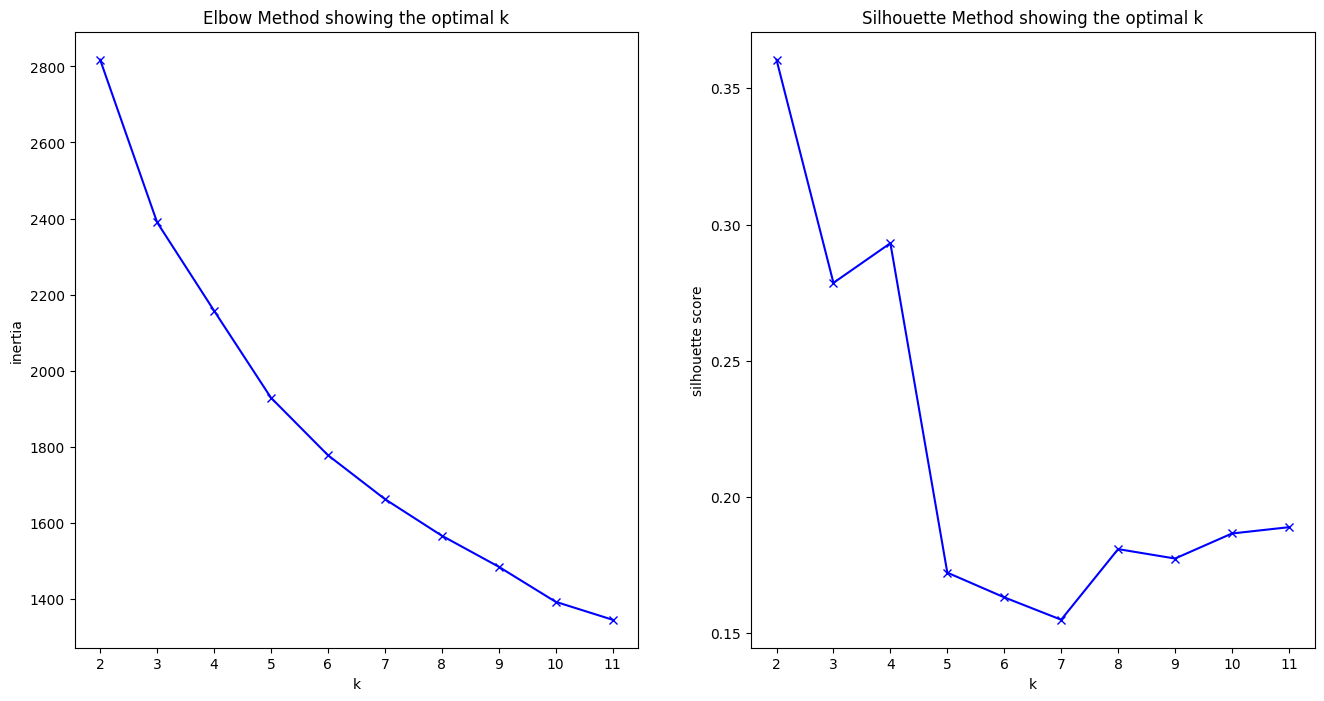

In [14]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')
plt.show()



In [15]:
number_of_clusters = list(np.arange(2,12))
number_of_clusters
silhouette

df_silhouete_number_of_clusters = pd.DataFrame(silhouette,number_of_clusters, columns=['nr_of_clusters[K]''silhouette'])
df_silhouete_number_of_clusters

,nr_of_clusters[K]silhouette
2,0.360508
3,0.278598
4,0.293160
5,0.172221
6,0.163153
7,0.154936
8,0.180856
9,0.177397
10,0.186593
11,0.188901


In [16]:
# the best k is 4 

In [17]:
#Clustering

kmeans_4 = KMeans(n_clusters = 4, random_state = 19)
kmeans_4.fit(df_treated)

clusters4 = kmeans_4.predict(df_treated)
pd.Series(clusters4).value_counts().sort_index()


C:\Users\Admin\Documents\Ironhack\Week_9\Final_bootcamp_project\final_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0     63
1    543
2    111
3     13
dtype: int64

In [18]:
df['clusters_4'] = clusters4
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_14384\2947433405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters_4'] = clusters4


,building_area,roof_height,borough,construction_year,area_type,green_roof_area,clusters_4
0,14057,59,BK,1900,public,971,1
1,4463,13,MN,1900,commercial,696,1
2,13217,93,MN,1900,commercial,293,1
3,4311,99,MN,1900,commercial,759,1
4,35891,206,BX,1990,commercial,7204,1
...,...,...,...,...,...,...,...
725,6414,104,MN,1800,residential,1525,1
726,2941,118,MN,1990,public,343,1
727,4350,175,MN,1990,industrial,309,1
728,20051,23,MN,1960,commercial,8139,1


In [19]:
# checking some patterns in the clusters

df[df['clusters_4']==0].sample(5)



,building_area,roof_height,borough,construction_year,area_type,green_roof_area,clusters_4
330,62229,155,MN,1990,industrial,13361,0
722,27075,68,BK,1930,commercial,12897,0
329,49623,72,BK,1990,industrial,7004,0
471,79527,35,BK,1960,commercial,8020,0
505,139709,258,BK,1960,residential,3637,0


In [20]:
df[df['clusters_4']==1].sample(5)

,building_area,roof_height,borough,construction_year,area_type,green_roof_area,clusters_4
3,4311,99,MN,1900,commercial,759,1
541,1182,21,BK,1900,commercial,639,1
23,22260,253,BK,1960,residential,949,1
493,4954,229,MN,1990,residential,328,1
481,10358,151,MN,1900,commercial,4463,1


In [21]:
df[df['clusters_4']==2].sample(5)

,building_area,roof_height,borough,construction_year,area_type,green_roof_area,clusters_4
598,23929,283,MN,1960,commercial,4780,2
480,13288,431,MN,1930,commercial,1930,2
584,48360,252,MN,1990,commercial,5086,2
570,98911,834,MN,1930,residential,14475,2
11,86153,568,MN,1960,commercial,2010,2


In [22]:
df[df['clusters_4']==3].sample(5)

,building_area,roof_height,borough,construction_year,area_type,green_roof_area,clusters_4
341,224776,50,BK,1990,residential,66025,3
10,152909,179,MN,1930,commercial,54774,3
679,56132,27,MN,1930,residential,26045,3
447,94646,216,MN,1990,industrial,28669,3
638,126149,74,MN,1990,commercial,55140,3


In [23]:
clusters2_df = df
clusters2_df.to_csv('../Data/cleaned_data/clusters2_df.csv', index = False)

In [24]:
#CONCLUSION: from here we can't notice any pattern

#NEXT_STEPS:
            # Explore this new clusters data frames to find some patterns
            # try this approach but with less outliers
            # Do another clustering usind DBSCAN